# GROUP ASSIGNMENT THE CODE COMMANDOS

## In code we trust, with commandos we conquer

<pre>
- Siebren Barten   (1756508)
- Puck de Bruin    (1665650)
- Jette Bruurs     (1746774)
- Jilke Nooijen    (1712616)
- Silke Peters     (1711210)
- Lyonne Vlaar     (1657313)
- Marijn ter Weeme (1703625)

First, install packages

In [21]:
import pandas as pd 
from rdkit.Chem import AllChem
from rdkit import Chem 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sn
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.model_selection import train_test_split

Read cvs files

In [22]:
df1 = pd.read_csv('tested_molecules-1.csv')
df1

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [23]:
df2 = pd.read_csv('tested_molecules_v2.csv')
df2

,SMILES,ALDH1_inhibition
0,[NH3+]CCSSCC[NH3+],0
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0
2,[NH3+]CCCCCCCCCC[NH3+],0
3,[NH3+]CCSSCC[NH3+],0
4,ClCC[NH+](CCCl)CCCl,0
...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
997,O=C(CCl)NC1CCCc2ccccc21,1
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


The df_untested is de dataframe with the 10.000 molecules. This dataframe is used to determine which molecules are ALDH1 inhibitors and which are not. 

In [24]:
df_untested=pd.read_csv("untested_molecules.csv")
SMILES_untested=df_untested['SMILES']

In [25]:
df= df1.append(df2,ignore_index=True)
df

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
1995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
1996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
1997,O=C(CCl)NC1CCCc2ccccc21,1
1998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


Next step is determining which descriptors we are going to use. Therefore we determine first all molecule descriptors and then filter missing values, duplicated rows and unique descriptors. 

In [26]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(df['SMILES'])
Mol_descriptors_untested, desc_names_untested = RDkit_descriptors(df_untested['SMILES'])
desc_names

('MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VS

In [27]:
df_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_descriptors_untested = pd.DataFrame(Mol_descriptors_untested, columns=desc_names_untested)
df_descriptors_untested

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.419814,13.419814,1.031891,-4.603365,0.349176,379.504,350.272,379.225977,148,0,...,0,0,0,0,0,0,0,0,0,0
1,14.015460,14.015460,0.531163,-6.494821,0.664725,442.537,416.329,442.156243,164,0,...,0,1,0,0,0,0,0,0,0,0
2,14.007780,14.007780,0.481963,-3.900763,0.499889,359.313,345.201,359.091749,134,0,...,0,0,0,0,0,0,0,0,0,0
3,12.733616,12.733616,0.757694,-3.989685,0.247581,358.374,338.214,358.139747,136,0,...,0,0,0,0,0,0,0,0,0,0
4,13.222851,13.222851,0.458763,-5.338708,0.376568,334.729,320.617,334.080823,120,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12.414049,12.414049,0.175145,-3.606342,0.648660,210.237,196.125,210.111676,82,0,...,0,0,0,0,0,0,0,0,0,0
9996,13.892880,13.892880,1.067221,-5.388921,0.323364,464.519,432.263,464.227099,182,0,...,0,0,0,0,0,0,0,0,0,0
9997,13.885132,13.885132,0.217513,-6.216018,0.460041,444.538,424.378,444.092597,156,0,...,1,1,0,0,0,0,0,0,0,0
9998,8.161291,8.161291,1.123413,-4.762543,0.665075,302.822,277.622,302.151748,114,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
correlation_matrix = df_descriptors.corr().abs()
threshold = 0.9
highly_correlated_columns = []
for column in range(len(correlation_matrix.columns)):
    for row in range(column):
        if correlation_matrix.iloc[column, row] > threshold:
            highly_correlated_columns.append(correlation_matrix.columns[column])
            
df_filtered = df_descriptors.drop(columns=highly_correlated_columns)
df_untested_filtered=df_descriptors_untested.drop(columns=highly_correlated_columns)

In [29]:
unique_descriptors = df_filtered.nunique()
col_to_drop = unique_descriptors[unique_descriptors== 1].index
df_filtered=df_filtered.drop(col_to_drop, axis=1)
df_untested_filtered=df_untested_filtered.drop(col_to_drop, axis=1)

In [30]:
df_merged = df.join(df_filtered)
df_merged_untested=df_untested_filtered.join(df_untested)

In [31]:
data_missing=df_merged.isnull()
missing_values=np.where(data_missing)
if len(missing_values[0])==0:
    print("There are no missing values")
else:
    print("The amount of missing values is "+str(len(missing_values[0])))

There are no missing values


In [32]:
df_duplicate = df_merged[df_merged.duplicated()]
if len(df_duplicate)==0:
    print("There are no duplicated rows")
else:
    print("The amount of duplicated rows is "+str(len(df_duplicate)))
df_without_duplicates=df_merged.drop_duplicates().reset_index()
df_untested_filtered=df_merged_untested.drop_duplicates().reset_index()

The amount of duplicated rows is 25


In [33]:
label=df_without_duplicates["ALDH1_inhibition"]
SMILES=df_without_duplicates["SMILES"]

First store the ALDH1_inhibition and SMILES and then scale the data with MinMax scaling. 

In [34]:
df_without_label=df_without_duplicates.drop("ALDH1_inhibition",axis=1)
df_without_label=df_without_label.drop("SMILES",axis=1).set_index("index")
desc_names=list(df_without_label.columns.values)

df_untested_without_SMILES=df_untested_filtered.drop("SMILES",axis=1).set_index("index")

In [35]:
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_without_label)
df_minmax = pd.DataFrame(df_minmax, columns=desc_names)

minmax = MinMaxScaler()
df_minmax_untested = minmax.fit_transform(df_untested_without_SMILES)
df_minmax_untested = pd.DataFrame(df_minmax_untested, columns=desc_names)

Determine how many principal components are needed for the analysis. Therefore we want to capture at least 90% of the dataset variance. 

,0
1,0.181294
2,0.263172
3,0.313574
4,0.358752
5,0.399052
...,...
154,1.000000
155,1.000000
156,1.000000
157,1.000000


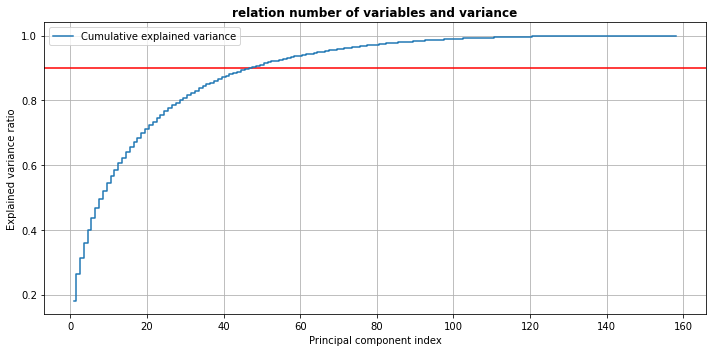

The number of variables needed for the PCA is: 48


In [36]:
pca = PCA()

# Determine transformed features
df_pca = pca.fit_transform(df_minmax)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
df_cum_sum = pd.DataFrame(cum_sum_eigenvalues)
df_cum_sum.index += 1
display(df_cum_sum)

# Create the visualization plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
#plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title('relation number of variables and variance', fontweight = 'bold')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#print point where variance is first above 0.9 
for i in range(1,len(df_cum_sum)): 
    if df_cum_sum[0][i] >= 0.9: 
        number_of_variables = df_cum_sum[0].index[i]
        print('The number of variables needed for the PCA is:', number_of_variables)
        break

Create dataframe where the amount of columns is equal to the amount of PC's. 

In [37]:

n_components = number_of_variables
pca = PCA(n_components = n_components)
components = pca.fit_transform(df_minmax)
df_components = pd.DataFrame(components)
#df_components["SMILES"] = SMILES
#df_components["ALDH1_inhibition"] = label
#df_pc = pd.DataFrame(abs(pca.components_), index=range(1,n_components+1), columns=desc_names).transpose()

components_untested = pca.fit_transform(df_minmax_untested)
df_components_untested = pd.DataFrame(components_untested)
#df_components_untested["SMILES"] = SMILES
#df_components_untested["ALDH1_inhibition"] = label
#df_pc_untested = pd.DataFrame(abs(pca.components_), index=range(1,n_components+1), columns=desc_names).transpose()


#sn.heatmap(df_pc, annot=False) mag deze heatmap weg?
#plt.show()
df_components

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.982698,-0.927110,0.168574,-0.132802,0.401990,-0.256283,-0.139911,0.029045,0.109040,0.272351,...,-0.043787,-0.310844,-0.063492,0.004458,0.138390,0.066620,0.082345,-0.041903,0.029850,-0.091252
1,-0.251778,-0.716335,0.323999,-0.154315,-0.166972,-0.322735,-0.178909,0.020054,-0.243916,-0.150823,...,0.094611,0.012619,0.030011,0.280872,0.052447,-0.023923,-0.071892,-0.151058,-0.129037,-0.103270
2,0.661575,-0.875980,0.858038,-0.728683,0.572093,-0.267250,-0.250755,0.035436,-0.531607,0.243716,...,-0.178794,-0.066166,0.030993,-0.075167,0.072112,-0.114849,-0.085433,0.132734,0.068218,-0.173455
3,-0.134245,0.429816,-0.023006,0.145209,-0.136804,-0.133038,0.362494,-0.053370,-0.076004,-0.148475,...,-0.001299,0.140411,-0.012111,-0.054360,-0.146472,-0.103582,-0.001585,-0.004060,0.054548,-0.000582
4,0.152382,-0.528294,0.326571,0.331793,-0.312937,-0.267665,0.574572,-0.246797,0.133695,-0.461382,...,0.028941,-0.013004,0.127301,-0.124117,0.018562,0.142105,0.014432,-0.146652,-0.131681,0.105841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,-0.065120,0.576328,-0.143376,0.423252,-0.153730,-0.023129,-0.154939,0.020560,-0.136814,0.131187,...,-0.100416,-0.194971,-0.166883,0.155550,-0.007674,0.045671,0.142358,-0.080672,0.144679,0.048681
1971,0.418971,0.532747,0.350583,0.118384,-0.245409,0.284398,-0.034349,-0.238980,-0.326109,-0.488771,...,-0.065230,-0.034533,0.123183,0.009359,-0.121563,0.036706,0.015591,-0.151009,-0.086259,0.090625
1972,0.050295,0.922096,-0.132138,-0.010912,-0.252162,-0.061478,-0.036162,-0.005027,-0.075871,-0.122240,...,-0.051414,-0.070722,-0.014353,0.044089,-0.032930,0.017814,0.004940,-0.154966,0.002152,0.019276
1973,0.398125,-0.620374,0.619036,-0.669284,0.144327,0.006649,0.143786,-0.167037,0.127836,0.105106,...,-0.085303,-0.117155,0.092732,-0.000184,0.024090,0.161069,0.045689,-0.107059,0.045989,-0.035587


Evaluate which features are important per PC

In the variable merged_df_incl_label, merged_df is displayed and the variable named label is added. In this way there is a dataframe with the ALDH1_inhibition column and the other columns so it is possible to split on the ALDH1_inhibition characteristic. 

,PC1,PC2,PC3,ALDH1_inhibition
0,0.982698,-0.927110,0.168574,1
1,-0.251778,-0.716335,0.323999,1
2,0.661575,-0.875980,0.858038,1
3,-0.134245,0.429816,-0.023006,1
4,0.152382,-0.528294,0.326571,1
...,...,...,...,...
1970,-0.065120,0.576328,-0.143376,1
1971,0.418971,0.532747,0.350583,1
1972,0.050295,0.922096,-0.132137,1
1973,0.398125,-0.620374,0.619037,1


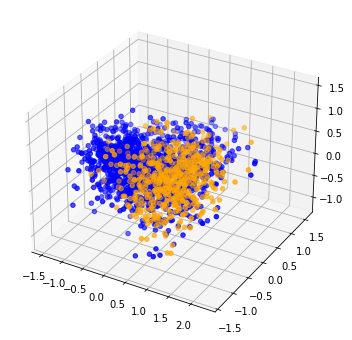

In [38]:
pca = PCA(n_components=48)
component_names = [f"PC{i+1}" for i in range(48)]
pca.fit(df_minmax)
transformed_data=pca.transform(df_minmax)
#transformed_untested_data=pca.transform(df_)
df_scores=pd.DataFrame(data=transformed_data,columns=component_names).iloc[:,:3]
inhibition=df["ALDH1_inhibition"]
df_scores["ALDH1_inhibition"]=inhibition

inh0_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC1"]
inh0_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC2"]
inh1_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC1"]
inh1_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC2"]
inh0_PC3=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC3"]
inh1_PC3=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC3"]

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection="3d")
ax.scatter3D(inh0_PC1, inh0_PC2, inh0_PC3, c="blue",label="0");
ax.scatter3D(inh1_PC1, inh1_PC2, inh1_PC3, c="orange",label="1");
df_scores

Split the data in test data and trainings data with a ratio of 80% trainings data and 20% test data. 

In [39]:
y = label
X = df_components
X_untested=df_components_untested
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_untested

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.349332,-0.027727,-0.223164,-0.378783,-0.305465,0.037093,0.219420,0.681907,-0.407741,0.153152,...,0.077926,0.035792,0.200618,0.018636,0.094769,-0.087010,-0.067912,0.019769,-0.017383,-0.039691
1,0.768263,0.182474,-0.049214,-0.394833,-0.410069,0.376496,-0.138702,-0.248845,0.110987,0.049053,...,-0.014330,0.014560,-0.037639,-0.037154,0.002664,0.061752,-0.037846,-0.029629,0.011029,0.020194
2,0.142033,0.421907,-0.638204,-0.234521,0.242093,-0.021900,0.126275,-0.581582,0.064466,-0.008557,...,-0.047938,0.056861,0.132671,-0.088983,0.064622,-0.054175,-0.077006,-0.015856,-0.055625,0.016691
3,0.106767,0.215419,-0.510744,-0.082348,0.260999,0.012608,0.236092,-0.037422,-0.577739,0.376648,...,-0.049657,0.135855,-0.153714,-0.009331,0.060091,0.010594,0.080112,-0.035919,-0.045608,-0.046260
4,0.138809,-0.189255,-0.001098,-0.416731,0.550133,-0.272852,-0.401176,-0.101823,-0.208852,0.095709,...,0.088297,0.164639,-0.070140,-0.103537,0.075144,-0.035306,0.000515,-0.150403,0.010495,-0.019146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,-0.102906,-0.488423,0.076227,-0.101055,0.658258,-0.181095,0.004996,0.134110,-0.322768,-0.512817,...,-0.023535,-0.027702,0.061835,0.106432,-0.001638,-0.049440,0.087241,0.020828,0.014382,-0.070029
9965,1.179126,0.573825,-0.408295,-0.221748,0.933042,0.127365,0.163696,0.635529,-0.526356,-0.039393,...,-0.273253,-0.151076,0.107508,0.198744,0.050918,0.031784,0.025783,-0.069369,-0.003212,0.051885
9966,0.268761,0.615678,0.205505,-0.168807,-0.178757,0.221932,-0.658566,-0.239328,0.108146,0.014708,...,0.064203,-0.082074,-0.071920,-0.053419,-0.083462,0.016659,0.008011,-0.007873,-0.055596,0.091040
9967,0.502637,-0.639100,0.000043,0.899190,0.183685,-0.177488,-0.209537,0.241914,-0.268837,0.492613,...,0.030857,0.054989,0.004072,0.159186,-0.213559,0.006505,-0.055774,-0.080946,0.292000,0.041853


Apply KNN

0.698136645962733


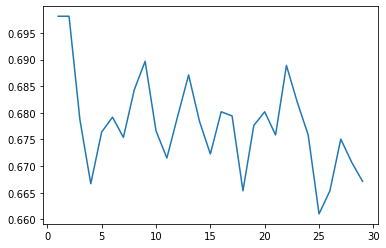

In [42]:
k_range = range(1,30)
scores = []
highest_value = 0
sub_highest_value = 0
optimal_k = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = metrics.balanced_accuracy_score(y_test, y_predict)
    scores.append(accuracy)
        
    if accuracy > sub_highest_value and accuracy <highest_value:
        sub_highest_value = accuracy
        sub_optimal_k = k
        
    if accuracy > highest_value:
        sub_highest_value =highest_value
        highest_value = accuracy
        sub_optimal_k = optimal_k
        optimal_k = k



plt.plot(k_range, scores);
print(highest_value)

Calculate the accuracy

In [43]:
neighbours = KNeighborsClassifier(n_neighbors=optimal_k)
neighbours.fit(X_train, y_train)
y_pred = neighbours.predict(X_test)
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)

In [84]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Creëer een Radius Neighbors-classifier met een straal van 0.5
rnc = RadiusNeighborsClassifier(radius=2.8)

# Pas het model toe op de trainingsdata
rnc.fit(X_train, y_train)

# Maak voorspellingen op nieuwe data
y_pred_3 = rnc.predict(X_test)

In [91]:
neighbours_2 = KNeighborsClassifier(n_neighbors=sub_optimal_k)
neighbours_2.fit(X_train, y_train)
y_pred_2 = neighbours_2.predict(X_test)
balanced_acc_2 = metrics.balanced_accuracy_score(y_test, y_pred_2)

In [92]:
prediction_untested_molecules = neighbours.predict(X_untested)
df_pred_untested = pd.DataFrame(prediction_untested_molecules)
een = 0
for pred in df_pred_untested[0]:
    if pred == 1:
        een +=1
        
df_pred_untested = df_pred_untested.join(df_untested_filtered["SMILES"])
df_pred_untested 

,0,SMILES
0,1,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1
...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC
9965,1,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1
9967,1,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl


In [93]:
prediction_untested_molecules_3 = rnc.predict(X_untested)
df_pred_untested_3 = pd.DataFrame(prediction_untested_molecules_3)
een = 0
for pred in df_pred_untested_3[0]:
    if pred == 1:
        een +=1
        
df_pred_untested_3 = df_pred_untested_3.join(df_untested_filtered["SMILES"])
df_pred_untested_3 

,0,SMILES
0,0,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1
...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC
9965,0,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1
9967,0,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl


In [94]:
prediction_untested_molecules_2 = neighbours_2.predict(X_untested)
df_pred_untested_2 = pd.DataFrame(prediction_untested_molecules_2)
een = 0
for pred in df_pred_untested_2[0]:
    if pred == 1:
        een +=1
        
df_pred_untested_2 = df_pred_untested_2.join(df_untested_filtered["SMILES"])
df_pred_untested_2

,0,SMILES
0,1,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1,1,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1
...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC
9965,1,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...
9966,1,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1
9967,0,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl


In [95]:
probabilities = neighbours.predict_proba(X_untested)

probabilities[:,1]

for i in range(probabilities.shape[1]):
    df_pred_untested[f"Probability_Label_{i}"] = probabilities[:, i]
    
df_pred_untested

,0,SMILES,Probability_Label_0,Probability_Label_1
0,1,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1,0.0,1.0
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...,1.0,0.0
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...,1.0,0.0
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...,1.0,0.0
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1,1.0,0.0
...,...,...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC,1.0,0.0
9965,1,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...,0.0,1.0
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1,1.0,0.0
9967,1,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl,0.0,1.0


In [96]:
probabilities_3 = rnc.predict_proba(X_untested)

probabilities_3[:,1]

for i in range(probabilities_3.shape[1]):
    df_pred_untested_3[f"Probability_Label_3{i}"] = probabilities_3[:, i]
    
df_pred_untested_3

,0,SMILES,Probability_Label_30,Probability_Label_31
0,0,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1,0.691262,0.308738
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...,0.689767,0.310233
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...,0.693454,0.306546
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...,0.694784,0.305216
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1,0.696547,0.303453
...,...,...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC,0.696950,0.303050
9965,0,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...,0.640824,0.359176
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1,0.693351,0.306649
9967,0,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl,0.686645,0.313355


In [97]:
probabilities_2 = neighbours_2.predict_proba(X_untested)

probabilities_2[:,1]

for i in range(probabilities_2.shape[1]):
    df_pred_untested_2[f"Probability_Label_2{i}"] = probabilities_2[:, i]
    
df_pred_untested_2

,0,SMILES,Probability_Label_20,Probability_Label_21
0,1,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1,0.444444,0.555556
1,1,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...,0.222222,0.777778
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...,0.888889,0.111111
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...,0.888889,0.111111
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1,0.777778,0.222222
...,...,...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC,0.888889,0.111111
9965,1,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...,0.444444,0.555556
9966,1,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1,0.444444,0.555556
9967,0,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl,0.666667,0.333333


In [98]:
df_pred_untested["probability_label_21"] = df_pred_untested_2["Probability_Label_21"]
df_pred_untested

,0,SMILES,Probability_Label_0,Probability_Label_1,probability_label_21
0,1,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1,0.0,1.0,0.555556
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...,1.0,0.0,0.777778
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...,1.0,0.0,0.111111
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...,1.0,0.0,0.111111
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1,1.0,0.0,0.222222
...,...,...,...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC,1.0,0.0,0.111111
9965,1,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...,0.0,1.0,0.555556
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1,1.0,0.0,0.555556
9967,1,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl,0.0,1.0,0.333333


In [99]:
df_pred_untested["Probability_label_31"] = df_pred_untested_3["Probability_Label_31"]

In [100]:
df_pred_untested["sum_probability_label_1"] = df_pred_untested["probability_label_21"] + df_pred_untested["Probability_Label_1"]+df_pred_untested["Probability_label_31"]
df_pred_untested

,0,SMILES,Probability_Label_0,Probability_Label_1,probability_label_21,Probability_label_31,sum_probability_label_1
0,1,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1,0.0,1.0,0.555556,0.308738,1.864293
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...,1.0,0.0,0.777778,0.310233,1.088011
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...,1.0,0.0,0.111111,0.306546,0.417657
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...,1.0,0.0,0.111111,0.305216,0.416327
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1,1.0,0.0,0.222222,0.303453,0.525675
...,...,...,...,...,...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC,1.0,0.0,0.111111,0.303050,0.414161
9965,1,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...,0.0,1.0,0.555556,0.359176,1.914731
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1,1.0,0.0,0.555556,0.306649,0.862205
9967,1,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl,0.0,1.0,0.333333,0.313355,1.646688


In [103]:
df_pred_untested_sorted = df_pred_untested.sort_values('sum_probability_label_1', ascending=False)
df_pred_untested_sorted.head(100)

,0,SMILES,Probability_Label_0,Probability_Label_1,probability_label_21,Probability_label_31,sum_probability_label_1
4359,1,C[NH+]1C2CCC1CC(OC(=O)C1CCC(C(=O)OC3CC4CCC(C3)...,0.0,1.0,0.888889,0.549865,2.438754
3627,1,COc1cc2c(cc1NC(=O)C(C)[NH+]1CCN(S(=O)(=O)c3ccc...,0.0,1.0,1.000000,0.341244,2.341244
6537,1,CCN(C(=O)C[NH+]1CCN(Cc2ccccc2)CC1)c1c(N)n(Cc2c...,0.0,1.0,1.000000,0.331633,2.331633
9591,1,COC(=O)C1=C(C)NC(C)=C(C(=O)OCC[NH+](C)Cc2ccccc...,0.0,1.0,1.000000,0.324567,2.324567
5422,1,COCCCN1C(=O)/C(=C/c2cc(OC)c(N3CCCC3)cc2OC)SC1=...,0.0,1.0,1.000000,0.322931,2.322931
...,...,...,...,...,...,...,...
2172,1,CCCCCCC1CCC(C(=O)NC(CCSC)C(=O)NC(C(=O)OC)C(C)C...,0.0,1.0,0.777778,0.397344,2.175122
9073,1,CC1(C)CC(=O)C(/C=N/CC[NH+]2CCN(C(=O)NC34CC5CC(...,0.0,1.0,0.666667,0.507353,2.174020
6447,1,O=C(NC12C[C@H]3C[C@@H](C1)C[C@@H](C2)C3)N1CC[N...,0.0,1.0,0.666667,0.505405,2.172072
6496,1,COC(=O)C1=C(C)N(Cc2ccccc2)C2=C3C(=O)N(c4ccccc4...,0.0,1.0,0.777778,0.391582,2.169359
